# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

__Interactive visualization__: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ 

__DBSCAN__ is a method that identify distinctive clusters in the data, based on the key idea that a cluster is a group of high data point density, separated from other such clusters by regions of low data point density. The main idea is to find highly dense regions and consider them as one cluster. It can easily discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

## Main DBSCAN Hyperparameters

* __minPts__: The minimum number of points (a threshold) clustered together for a region to be considered dense i.e. the minimum number of data points that can form a cluster
* __eps ($ε$)__: A distance measure that will be used to locate the points in the neighborhood of any point.

More importantly, DBSCAN can find __arbitrary shape clusters__ that __k-means are not able to find__. For example, a cluster surrounded by a different cluster:

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*KqWII7sFp1JL0EXwJGpqFw.png" width="800">

Also, DBSCAN can handle __noise__ and __outliers__. All the outliers will be identified and marked without been classified into any cluster. 

Therefore, DBSCAN can also be used for __Anomaly Detection__ (Outlier Detection)

## DBSCAN Concepts

The algorithm takes care of two concepts called __Density Reachability__ and __Density Connectivity__:

#### 1. Density Reachability (plot a)
A point to be reachable from another if it lies within a particular distance (``eps``, $ε$) from it, which indicates how __densely reachable__ a cluster is.

#### 2. Density Connectivity (plot b)
DBSCAN involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, a and d points could be connected if $a \rightarrow b \rightarrow c \rightarrow d$, where $p \rightarrow q$ means $q$ is in the neighborhood of $p$.

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*MH9tyNcD5g6hp9UuPIR1cQ.png" width="600">

In this method, there are three different types of data points:

* __Core point__: A data point which has at least ``minPts`` within the distance of $ε$.
* __Border point__: A data point which is in within $ε$ distance from core data point but not a core point.
* __Noise point__: A data point which is neither core nor border data point.

<img src="https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png" width="400">

## Algorithmic steps for DBSCAN clustering

1. Initially, it starts with a random unvisited starting data point. All points within a distance $Ɛ$ classify as neighborhood points.
2. It needs a minimum number of ``minPts`` points within the neighborhood to start the clustering process. Otherwise, the point gets labeled as ``Noise``. In either case, the current point becomes a visited point.
3. All points within the distance $Ɛ$ become part of the same cluster. Repeat the procedure for all the new points added to the cluster group. Continue utill it visits and labels each point within the $Ɛ$ neighborhood of the cluster.
4. On completion of the process, it starts again with a new unvisited point thereby leading to the discovery of more clusters or noise. At the end of the process, you ensure that you mark each point as either cluster or noise

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*WBRWZwSeIw-V4Hw9-_0xrQ.gif" width="400">

### DBSCAN in Python

Now, let’s implement the same using sample dataset from ``sklearn.datasets`` and DBSCAN module with $ε$ of $0.3$ and ``minPts`` as $10$.

In [4]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import plotly.express as px

X, labels_true = make_circles(n_samples=1000, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)

C:\Users\Raimundo\.conda\envs\AAS\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



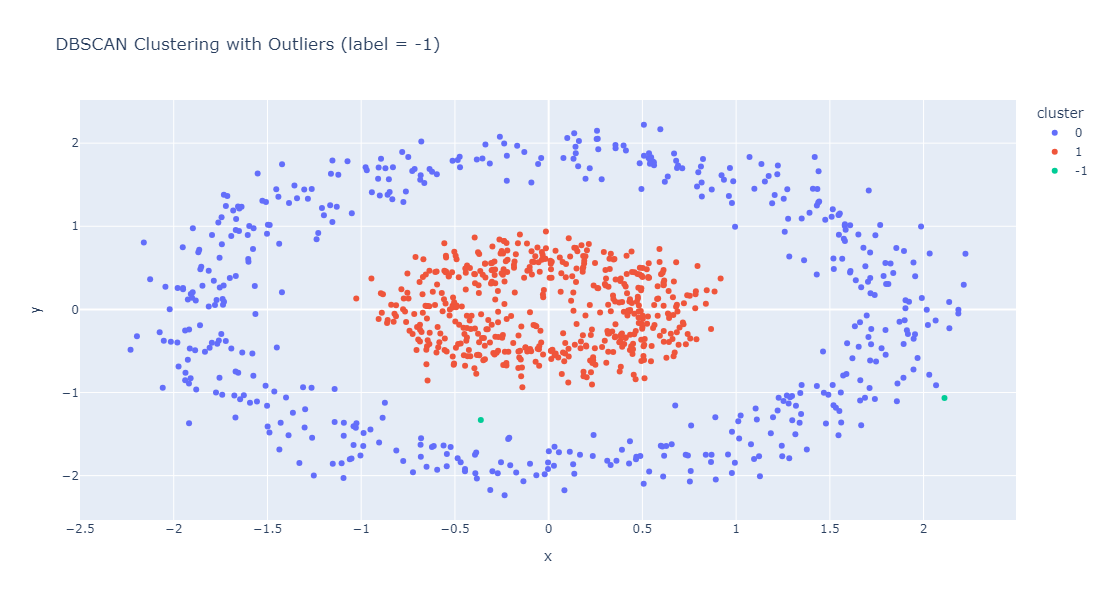

In [8]:
# Extract cluster labels
labels = db.labels_

# Identify indices of core samples
# Retrived from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Create a DataFrame for plotting
import pandas as pd
df = pd.DataFrame(X, columns=['x', 'y'])
df['cluster'] = labels.astype(str)

# Plot using Plotly Express
fig = px.scatter(df, x='x', y='y', color='cluster', width=800, height=600,
                 color_continuous_scale=px.colors.qualitative.G10,
                 title="DBSCAN Clustering with Outliers (label = -1)")

fig.show()

### Another example

In [11]:
df = pd.read_csv('Mall_Customers.csv')
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

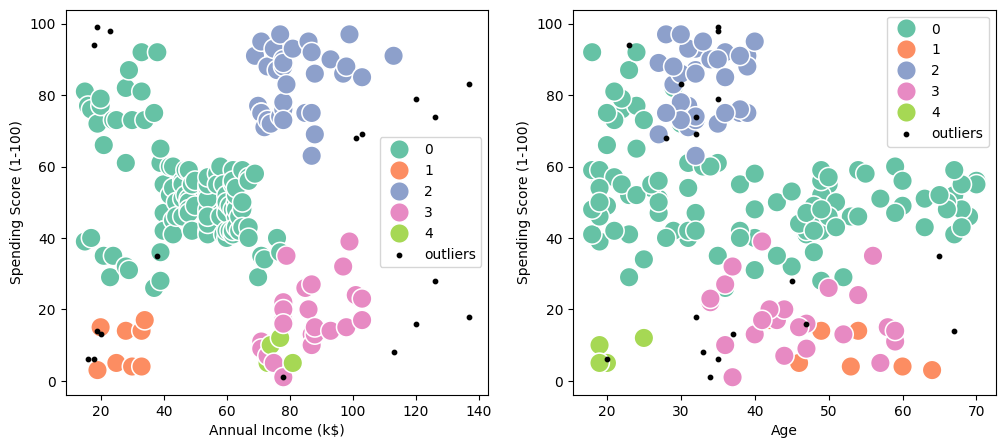

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', ax=axes[1], palette='Set2', legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

### DBSCAN vs. k-Means

K-means algorithms have tendency to form __spherical clusters__ only. It fails when data is not spherical in nature i.e. equally variant in all directions. 

Along with that K-means is __sensitive to outliers__, so basically a slight change in data points might affect the clustering outcome. Also, DBSCAN detects the number of clusters on it's own, no prior knowledge is necessary. Whereas that is not the case K-means, we need to decide the number of clusters $k$ prior to the modelling.

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*nPQZZ1xTOjhfV_8rwe3DjQ.png" width="800">

#### Pros
* The DBSCAN is better than other cluster algorithms because it does not require a pre-set number of clusters.
* It identifies outliers as noise, unlike the Mean-Shift method that forces such points into the cluster in spite of having different characteristics.
* It finds arbitrarily shaped and sized clusters quite well.

#### Cons
* It is not very effective when you have clusters of varying densities. There is a variance in the setting of the distance threshold Ɛ and the minimum points for identifying the neighborhood when there is a change in the density levels.
* If you have high dimensional data, the determining of the distance threshold Ɛ becomes a challenging task. task.